# O Distúrbio de gravidade e outras anomalias

Notebook que demonstrará o cálculo do distúrbio de gravidade e a anomalia bouguer

## Gravidade real

A gravidade medida é definida como o módulo da aceleração da gravidade em um determinado ponto próxima a superfície terrestre, que é igual ao módulo do gradiente do potencial de gravidade. O potencial de gravidade inclui duas componentes, uma componente gravitacional e outra centrífuga. A componente gravitacional é devido à atração gravitacional das massas que compõem a Terra e a componente centrífuga devido à rotação da terra. Matematicamente, isto é representado como:

$$ W(P) = V(P) + \Phi(P), $$
em que $W(P)$ é o potencial de gravidade em um ponto P próximo a superfície terrestre, $V(P)$ é o potencial gravitacional e $\Phi(P)$ é o potencial centrífugo. Portanto, o campo de gravidade terrestre é dado por:

$$ \mathbf{g}(P) = \mathbf{\nabla}V(P) + \mathbf{\nabla} \Phi(P), $$
que é o que chamamos de **vetor de gravidade**. O módulo deste vetor, ou seja, $ \parallel \mathbf{g}(P) \parallel$ é o que chamamos de **gravidade**. A gravidade é dada em  $mGal$ (miligal), em que $ 1 \, mGal = 10^5 \, m/s^{2}$. 

## Campo de gravidade Normal

Uma das formas de investigarmos as massas anômalas no interior da Terra é definindo um modelo que servirá de base para a definição das anomalias de gravidade. De fato, a Terra pode ser aproximada por um elipsóide de revolução (*i.e.,* um elipsóide oblato), que possui características semelhantes a Terra real. Neste sentido, chamamos o campo gerado por este modelo como **campo de gravidade normal**. Este campo seria observado em um elipsóide de referência que melhor aproxima a figura da Terra, que possui a mesma velocidade de rotação e mesma massa. De forma análoga a gravidade real, o campo de gravidade normal é gerado por um **potencial normal**, que também possui duas componentes: uma gravitacional e outra centrífuga. Portanto, o potencial que gera a gravidade normal pode ser definido como: 

$$ U(P) = V_{el} (P) + \Phi(P), $$
em que $U(P)$ é o potencial de gravidade normal, $V_{el} (P)$ é o potencial gravitacional e $\Phi(P)$ é o potencial centrífugo. O **vetor gravidade normal** é, consequentemente, dado por:

$$ \mathbf{\gamma} (P) = \mathbf{\nabla}V_{el}(P) + \mathbf{\nabla} \Phi(P), $$
no qual o módulo $\parallel \mathbf{\gamma} (P) \parallel$ é a gravidade normal. 

## Distúrbio de gravidade

O distúrbio de gravidade é definido como a diferença entre a gravidade medida (real) e a gravidade produzida pelo elipsóide de referência (normal) em um mesmo ponto P. Neste sentido, o **vetor distúrbio de gravidade** pode ser definido como:

$$ \mathbf\delta g (P) = \mathbf{g} (P) - \mathbf{\gamma} (P), $$
em que $\delta g (P)$ é o distúrbio de gravidade, $g (P)$ é a gravidade medida e $\gamma (P)$ é a gravidade normal. Os distúrbios de gravidade são os que permitem inferir sobre a estrutura interna da Terra. Esta quantidade potencial pode ser interpretada como o efeito gravitacional das massas anômalas no interior da Terra, ou seja, tudo o que não está contido na Terra normal. 

## Importando bibliotecas

Importando as bibliotecas que serão utilizadas para manipulação e visualização dos dados de gravidade.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import harmonica as hm
import cartopy.crs as ccrs
import matplotlib.colors as colors
import boule as bl

## Carregando os dados do modelo geopotencial XGM2019e

Dados baixados do [*International Center for Global Earth Models* (ICGEM)](http://icgem.gfz-potsdam.de/home).

In [2]:
fname = 'dataset/earth_gravity_XGM2019e.gdf'
gravity = hm.load_icgem_gdf(fname)

In [3]:
fname = 'dataset/geoid_XGM2019e.gdf'
geoid = hm.load_icgem_gdf(fname)

In [4]:
fname = 'dataset/topography.gdf'
topo = hm.load_icgem_gdf(fname)

### Armazenando os dados em um array

In [5]:
lat = gravity.latitude
lon = gravity.longitude
elevation = gravity.h_over_geoid
data = gravity.gravity_earth
geoidal_height = geoid.geoid
topography = topo.topography_grd

## Gravidade real (mundo inteiro)

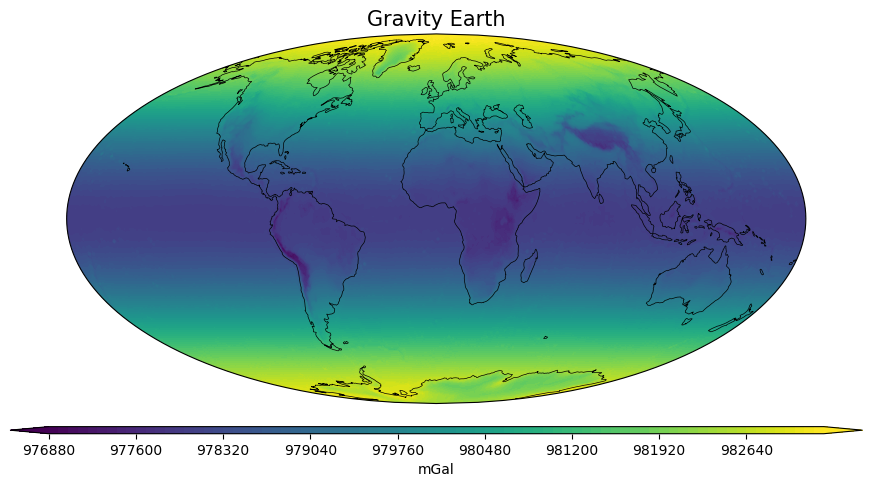

In [6]:
fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(projection=ccrs.Mollweide())
ax.coastlines(linewidth=0.5)
ax.set_global()
ax.set_title('Gravity Earth',fontsize=15)
cmap = ax.contourf(lon,lat,data,100,transform=ccrs.PlateCarree(),cmap='viridis',extend='both')
cbar = fig.colorbar(cmap,orientation='horizontal',pad=0.05,aspect=120,spacing='uniform',ax=ax)
cbar.set_label('mGal',fontsize=10)

plt.show()

## Gravidade Normal sobre a superfície terrestre

In [7]:
normal_gravity = bl.WGS84.normal_gravity(lat, elevation)

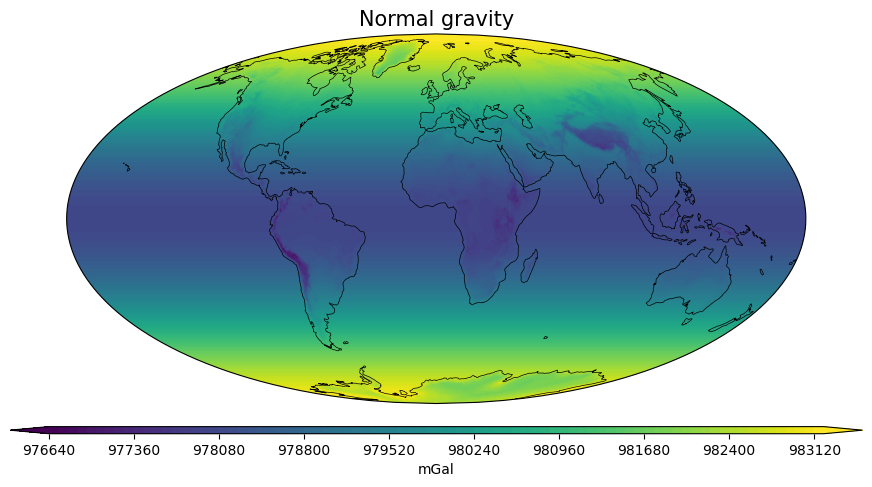

In [8]:
fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(projection=ccrs.Mollweide())
ax.coastlines(linewidth=0.5)
ax.set_global()
ax.set_title('Normal gravity',fontsize=15)
cmap = ax.contourf(lon,lat,normal_gravity,100,transform=ccrs.PlateCarree(),cmap='viridis',extend='both')
cbar = fig.colorbar(cmap,orientation='horizontal',pad=0.05,aspect=120,spacing='uniform',ax=ax)
cbar.set_label('mGal',fontsize=10)

plt.savefig('images/normal_gravity_surface.png',dpi=200,bbox_inches='tight')
plt.show()

## Distúrbio de gravidade 

In [9]:
disturbance = data - normal_gravity

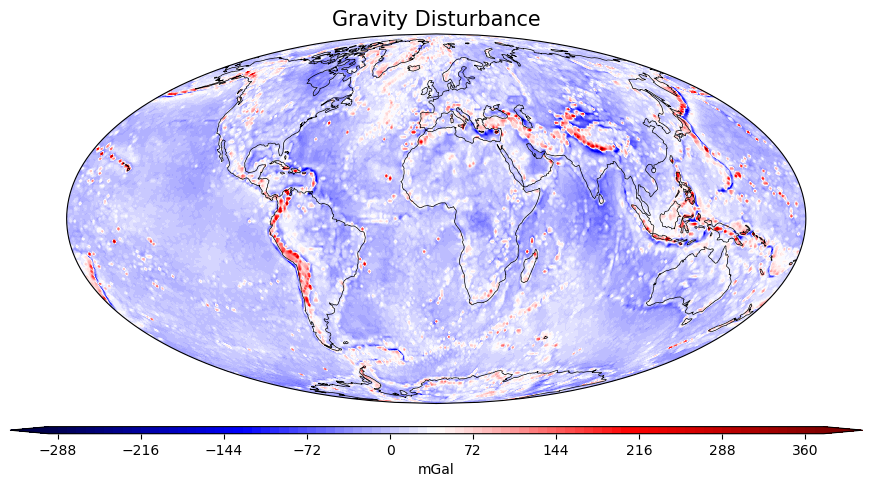

In [10]:
fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(projection=ccrs.Mollweide())
ax.coastlines(linewidth=0.5)
ax.set_global()
ax.set_title('Gravity Disturbance',fontsize=15)
cmap = ax.contourf(lon,lat,disturbance,100,transform=ccrs.PlateCarree(),cmap='seismic',extend='both')
cbar = fig.colorbar(cmap,orientation='horizontal',pad=0.05,aspect=120,spacing='uniform',ax=ax)
cbar.set_label('mGal',fontsize=10)

plt.savefig('images/gravity_disturbance.png',dpi=200,bbox_inches='tight')
plt.show()

## Anomalia Bouguer

Calcular o distúrbio de gravidade é o primeiro passo para gerar um conjunto de dados que vão nos fornecer informações sobre as estruturas no interior da Terra. Um dos sinais presentes nos distúrbios de gravidade são os efeitos gravitacionais das topografia, ou seja, de toda a massa localizada acima da superfície de referência (*i.e.*, do elipsoide de referência). Este efeito surge não somente da proximidade entre os pontos de observação e estas estruturas, mas também de seu contraste de densidade que pode ser considerado como sua própria densidade absoluta. Portanto, é de extrema importância retirar do dado de gravidade o efeito gerado por estas massas topográficas, principalmente, se o interesse de estudo está situado em estruturas abaixo da superfície terrestre. O resultado desta correção é o que chamamos de **Anomalia Bouguer**. A correção bouguer consiste em aproximar o efeito destas massas topográficas pelo efeito de uma placa com densidade constante. Neste sentido, a correção bouguer pode ser dada por: 

$$ g_{B} = 2 \pi \rho G h, $$
em que $\rho$ é a densidade, $G$ é a constante gravitacional e $h$ é a altura de medição.

In [11]:
reference = geoidal_height + topography

In [12]:
bouguer_correction = hm.bouguer_correction(reference)

In [13]:
bouguer_anomaly = disturbance - bouguer_correction

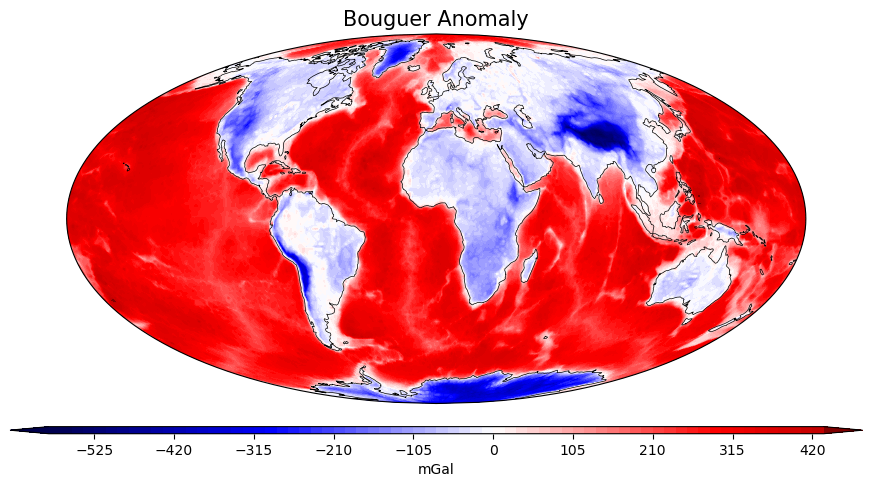

In [14]:
fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(projection=ccrs.Mollweide())
ax.coastlines(linewidth=0.5)
ax.set_global()
ax.set_title('Bouguer Anomaly',fontsize=15)
cmap = ax.contourf(lon,lat,bouguer_anomaly,100,transform=ccrs.PlateCarree(),cmap='seismic',norm=colors.CenteredNorm(),extend='both')
cbar = fig.colorbar(cmap,orientation='horizontal',pad=0.05,aspect=120,spacing='uniform',ax=ax)
cbar.set_label('mGal',fontsize=10)

plt.savefig('images/bouguer_anomaly.png',dpi=200,bbox_inches='tight')
plt.show()